In [14]:
import numpy as np
import matplotlib.pyplot as plt

L_ = 1
R_ = .05
r_ = .01
N_ = 2
n_ = 20
n_runs_ = 5000

In [15]:
def collision_condition(excluded_volume, center, radius):
    for excluded_region in excluded_volume:
            if (excluded_region[0] < center + radius/2 < excluded_region[1]) or (excluded_region[0] < center - radius/2 < excluded_region[1]):
                return True
            return False

In [16]:
excluded_volume = []

In [17]:
def simulation(L = L_, R = R_,r = r_,N = N_,n = n_, n_runs = n_runs_):
    j = 0
    when_collisions= set()
    while j<n_runs:
        j+=1
        collision = False
        excluded_volume = []
        # Big Balls!
        for i in range(N):
            center = np.random.rand()
            if collision_condition(excluded_volume, center, radius = R):
                collision = True
                when_collisions.add(j)
                break
            else: excluded_volume.append([center- R/2,center + R/2])
        if collision:
            continue
        for i in range(n):
            center = np.random.rand()
            if collision_condition(excluded_volume, center, radius = r):
                when_collisions.add(j)
                break
            else: excluded_volume.append([center- r/2,center + r/2])
            
    return len(set(range(n_runs))-when_collisions)/n_runs

In [18]:
success_rate = []
n_values =  range(100)
for n_ in n_values:
    success_rate.append(simulation(L = L_, R = R_,r = r_,N = N_,n = n_, n_runs = n_runs_))

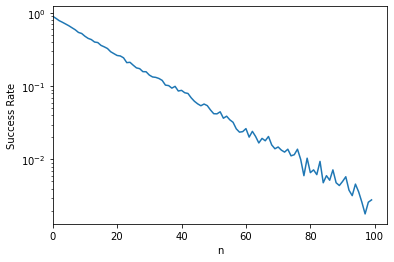

In [19]:
plt.plot(n_values, success_rate)
#plt.ylim(0,None)
plt.xlim(0,None)
plt.ylabel('Success Rate')
plt.xlabel('n')
plt.yscale('log')

In [20]:
success_rate = []
n_ = 20
N_values =  range(10)
for N_ in N_values:
    success_rate.append(simulation(L = L_, R = R_,r = r_,N = N_,n = n_, n_runs = n_runs_*10))

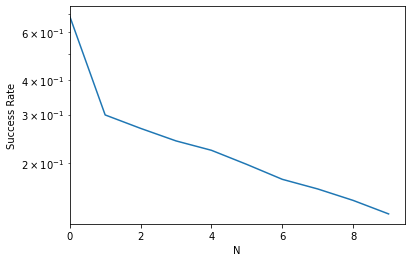

In [21]:
plt.plot(N_values, success_rate)
#plt.ylim(0,None)
plt.xlim(0,None)
plt.ylabel('Success Rate')
plt.xlabel('N')
plt.yscale('log')

In [22]:
success_rate = []
n_ = 20
N_ = 2
r_values = np.linspace(0,R_,100)
for r_ in r_values:
    success_rate.append(simulation(L = L_, R = R_,r = r_,N = N_,n = n_, n_runs = n_runs_))

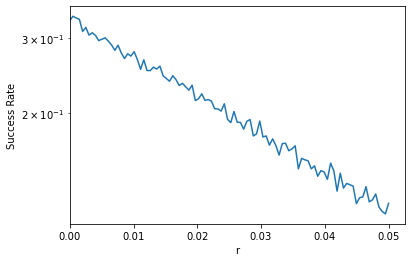

In [23]:
plt.plot(r_values, success_rate)
#plt.ylim(0,None)
plt.xlim(0,None)
plt.ylabel('Success Rate')
plt.xlabel('r')
plt.yscale('log')

In [24]:
success_rate = []
n_ = 20
N_ = 2
r_ = .01
R_values = np.linspace(r_,L_/2,100)
for R_ in R_values:
    success_rate.append(simulation(L = L_, R = R_,r = r_,N = N_,n = n_, n_runs = n_runs_))

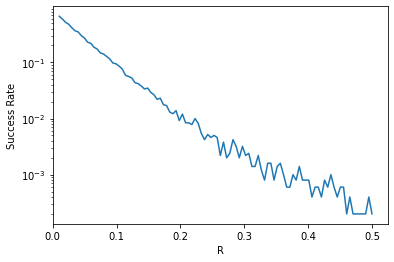

In [25]:
plt.plot(R_values, success_rate)
#plt.ylim(0,None)
plt.xlim(0,None)
plt.ylabel('Success Rate')
plt.xlabel('R')
plt.yscale('log')